## Advanced Regression Assignment

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy, to enter the market. A regression model with regularisation is required in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house?
- How well those variables describe the price of a house?

The solution is divided into the following sections:

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation
- Observation and inference

### Data Understanding and exploration

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', None)

In [2]:
# reading the dataset
df = pd.read_csv("train.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [4]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.shape

(1460, 81)

### Data Cleaning

In [6]:
#dropping if any duplicates
df.drop_duplicates(inplace=True)
df.shape

(1460, 81)

In [7]:
# Checking for percentage nulls
nullValuesPerColumn =round(100*(df.isnull().sum()/len(df.index)), 2)
nullValuesPerColumn

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [8]:
df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [9]:
#list of categorical variables with null values
null_cat = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_cat:
    print('Variable '+str(i) +': '+ str(df[i].unique()))

Variable Alley: [nan 'Grvl' 'Pave']
Variable MasVnrType: ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
Variable BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']
Variable BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']
Variable BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan]
Variable BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
Variable BsmtFinType2: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Variable FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Variable GarageType: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
Variable GarageFinish: ['RFn' 'Unf' 'Fin' nan]
Variable GarageQual: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Variable GarageCond: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
Variable PoolQC: [nan 'Ex' 'Fa' 'Gd']
Variable Fence: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
Variable MiscFeature: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [10]:
for i in null_cat:
    df[i].fillna("NA", inplace=True)

In [11]:
#Imputing the missing values by median/mode (according to data type) for remaining features
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].median())
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].median())
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

In [12]:
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

In [13]:
# Dropping the ID column,as it adds no value to analysis

df = df.drop("Id", axis = 1)

In [14]:
cat_cols=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

cont_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']

#### Exploratory Data Analysis

----------MSSubClass----------


count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
90%       120.000000
95%       160.000000
99%       190.000000
max       190.000000
Name: MSSubClass, dtype: float64


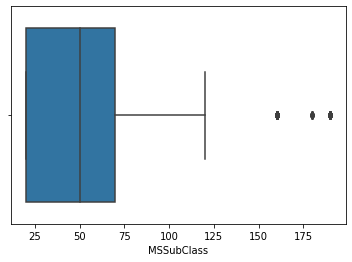

----------LotFrontage----------


count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
90%        92.000000
95%       104.000000
99%       137.410000
max       313.000000
Name: LotFrontage, dtype: float64


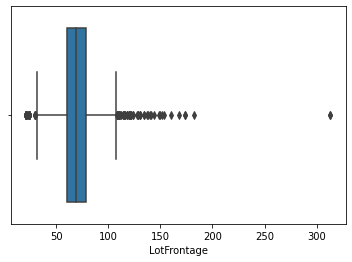

----------LotArea----------


count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
90%       14381.700000
95%       17401.150000
99%       37567.640000
max      215245.000000
Name: LotArea, dtype: float64


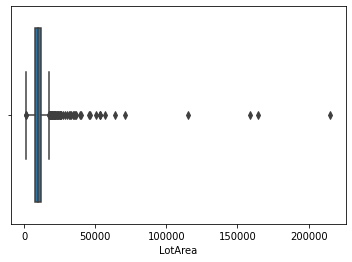

----------OverallQual----------


count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
90%         8.000000
95%         8.000000
99%        10.000000
max        10.000000
Name: OverallQual, dtype: float64


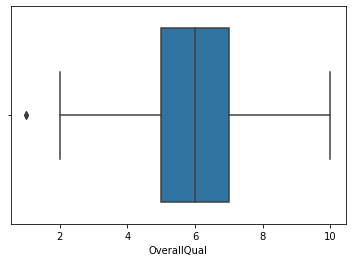

----------OverallCond----------


count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
90%         7.000000
95%         8.000000
99%         9.000000
max         9.000000
Name: OverallCond, dtype: float64


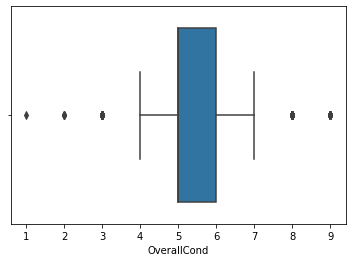

----------YearBuilt----------


count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: YearBuilt, dtype: float64


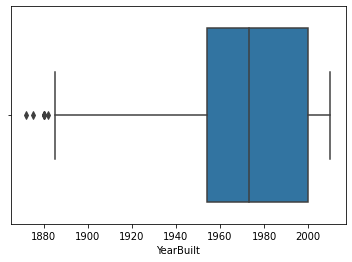

----------YearRemodAdd----------


count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


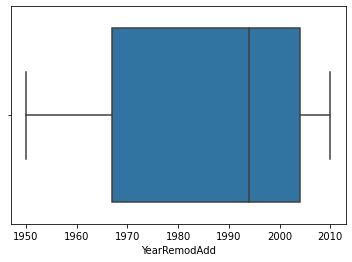

----------MasVnrArea----------


count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
90%       335.000000
95%       456.000000
99%       791.280000
max      1600.000000
Name: MasVnrArea, dtype: float64


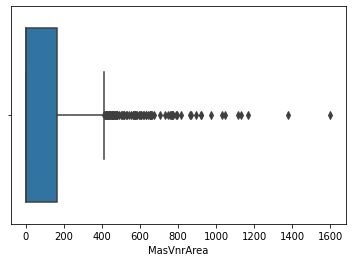

----------BsmtFinSF1----------


count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
90%      1065.500000
95%      1274.000000
99%      1572.410000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


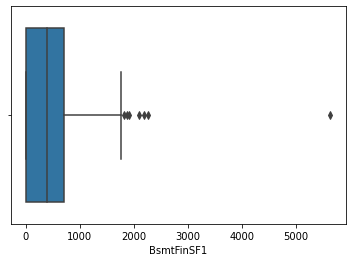

----------BsmtFinSF2----------


count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%       117.200000
95%       396.200000
99%       830.380000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


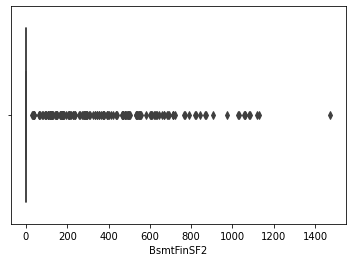

----------BsmtUnfSF----------


count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
90%      1232.000000
95%      1468.000000
99%      1797.050000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


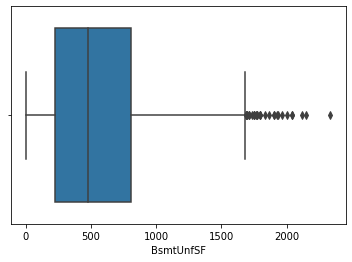

----------TotalBsmtSF----------


count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
90%      1602.200000
95%      1753.000000
99%      2155.050000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


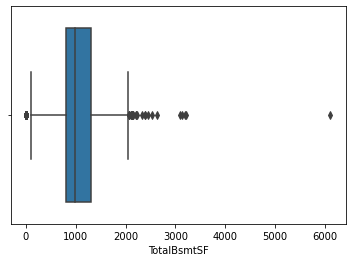

----------1stFlrSF----------


count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
90%      1680.000000
95%      1831.250000
99%      2219.460000
max      4692.000000
Name: 1stFlrSF, dtype: float64


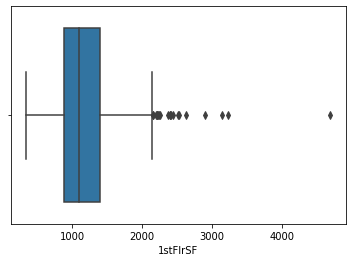

----------2ndFlrSF----------


count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
90%       954.200000
95%      1141.050000
99%      1418.920000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


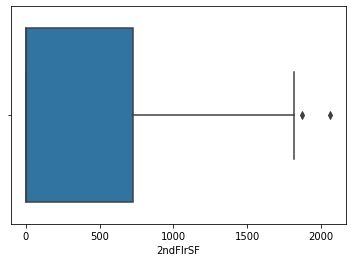

----------LowQualFinSF----------


count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%       360.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


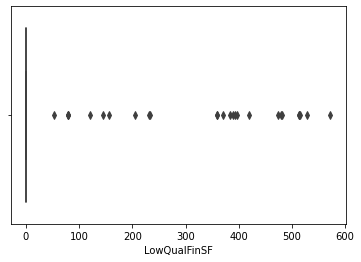

----------GrLivArea----------


count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
90%      2158.300000
95%      2466.100000
99%      3123.480000
max      5642.000000
Name: GrLivArea, dtype: float64


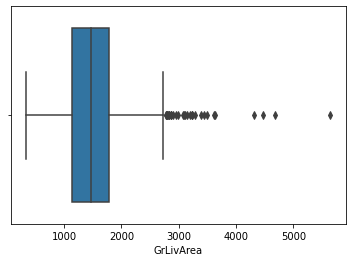

----------BsmtFullBath----------


count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
90%         1.000000
95%         1.000000
99%         2.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


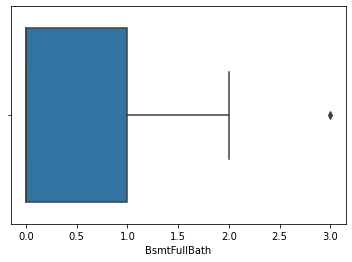

----------BsmtHalfBath----------


count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         1.000000
99%         1.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


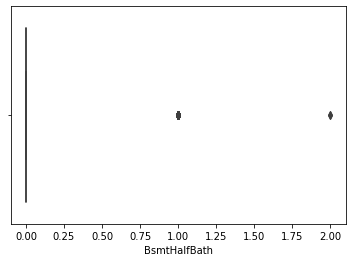

----------FullBath----------


count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
90%         2.000000
95%         2.000000
99%         3.000000
max         3.000000
Name: FullBath, dtype: float64


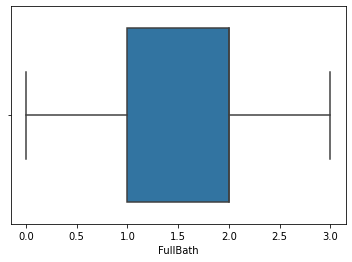

----------HalfBath----------


count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
90%         1.000000
95%         1.000000
99%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


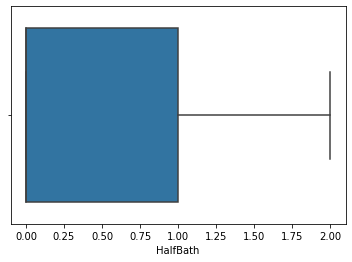

----------BedroomAbvGr----------


count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
90%         4.000000
95%         4.000000
99%         5.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


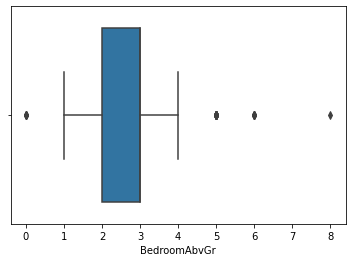

----------KitchenAbvGr----------


count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
90%         1.000000
95%         1.000000
99%         2.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


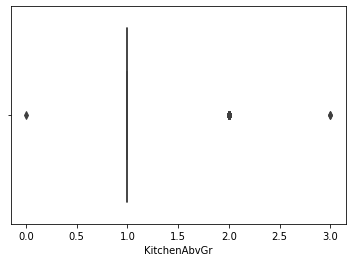

----------TotRmsAbvGrd----------


count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
90%         9.000000
95%        10.000000
99%        11.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


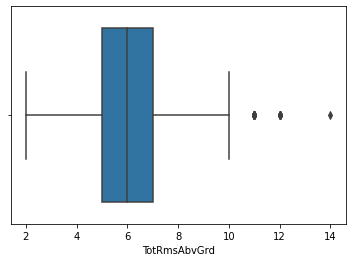

----------Fireplaces----------


count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
90%         1.000000
95%         2.000000
99%         2.000000
max         3.000000
Name: Fireplaces, dtype: float64


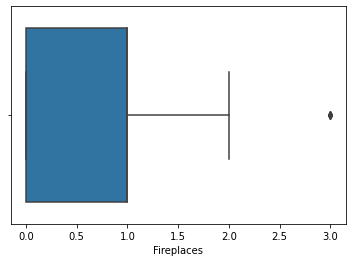

----------GarageYrBlt----------


count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


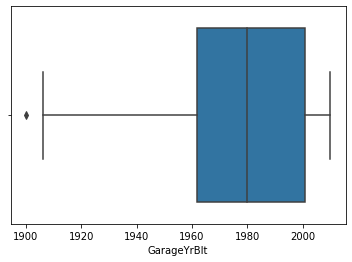

----------GarageCars----------


count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
90%         3.000000
95%         3.000000
99%         3.000000
max         4.000000
Name: GarageCars, dtype: float64


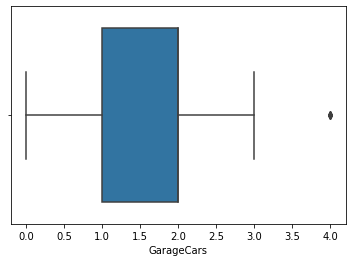

----------GarageArea----------


count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
90%       757.100000
95%       850.100000
99%      1002.790000
max      1418.000000
Name: GarageArea, dtype: float64


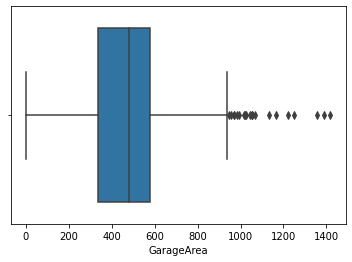

----------WoodDeckSF----------


count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
90%       262.000000
95%       335.000000
99%       505.460000
max       857.000000
Name: WoodDeckSF, dtype: float64


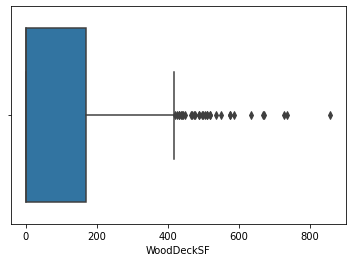

----------OpenPorchSF----------


count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
90%       130.000000
95%       175.050000
99%       285.820000
max       547.000000
Name: OpenPorchSF, dtype: float64


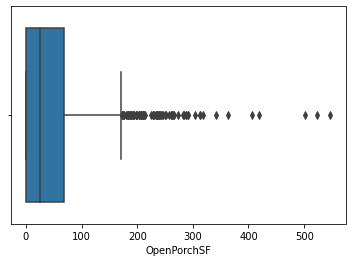

----------EnclosedPorch----------


count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%       112.000000
95%       180.150000
99%       261.050000
max       552.000000
Name: EnclosedPorch, dtype: float64


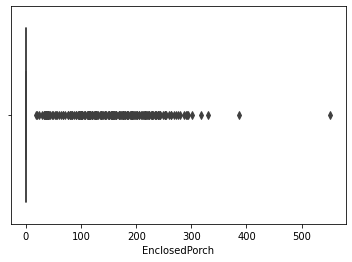

----------3SsnPorch----------


count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%       168.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


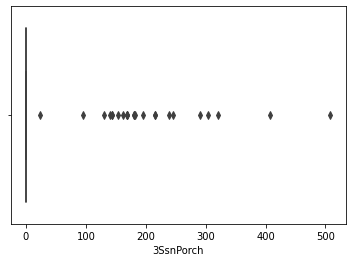

----------ScreenPorch----------


count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%       160.000000
99%       268.050000
max       480.000000
Name: ScreenPorch, dtype: float64


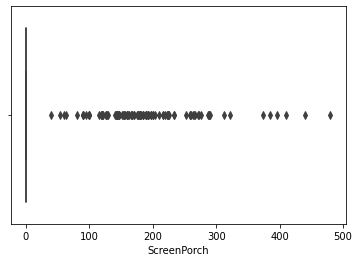

----------PoolArea----------


count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


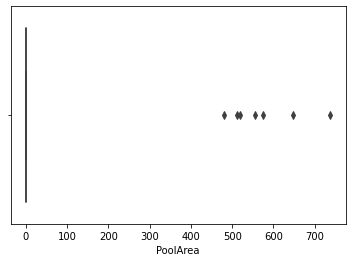

----------MiscVal----------


count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.000000
99%        700.000000
max      15500.000000
Name: MiscVal, dtype: float64


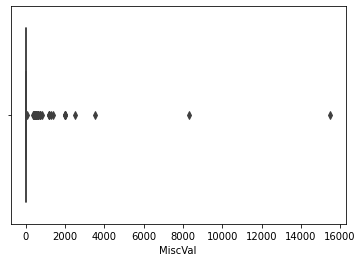

----------MoSold----------


count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
90%        10.000000
95%        11.000000
99%        12.000000
max        12.000000
Name: MoSold, dtype: float64


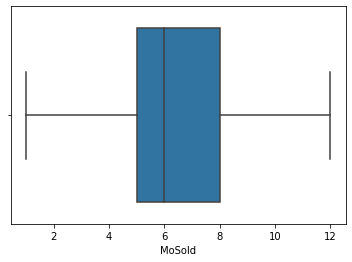

----------YrSold----------


count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
90%      2010.000000
95%      2010.000000
99%      2010.000000
max      2010.000000
Name: YrSold, dtype: float64


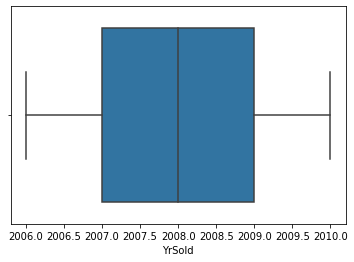

----------SalePrice----------


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64


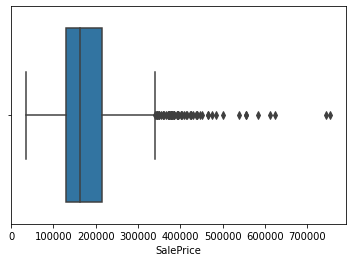

In [15]:
for i in cont_cols:
    print('----------'+i+'----------')
    sns.boxplot(df[i])
    print('\n')
    print(df[i].describe(percentiles=[.25,.5,.75,.90,.95,.99]))
    plt.show()

In [16]:
df.describe(percentiles = [0.1,0.25, 0.5, 0.75, 0.80, 0.90, 0.95, 0.99, 1])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
10%,20.000000,49.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1948.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
80%,80.000000,80.000000,12205.800000,7.000000,7.000000,2003.000000,2005.000000,205.200000,806.400000,0.000000,896.000000,1391.200000,1482.400000,796.200000,0.000000,1869.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,2003.000000,2.000000,620.200000,192.000000,83.200000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,230000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000

In [17]:
#removing outliers
list_outliers = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
                 'BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','EnclosedPorch',
                 '3SsnPorch']

In [18]:
def remove_outliers(x,y):
    out= x[y].quantile(0.99)
    x = x[x[y] < out]
    return x

In [19]:
for col in list_outliers:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.99)
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    df = df[((df[col] >= lower_bound) & (df[col] <= upper_bound))]

In [20]:
df.shape

(1453, 80)

In [21]:
df[list_outliers].describe(percentiles=[.10,.15,.25,.5,.75,.90,.95,.97,.99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,GrLivArea,EnclosedPorch,3SsnPorch
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,69.455609,10046.198899,102.499656,438.571232,46.108052,1052.309704,1157.817619,1511.103923,22.059876,3.076394
std,20.023890,5455.770620,179.791418,434.631272,160.383167,417.446520,374.064840,514.708599,61.247240,26.232386
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,334.000000,334.000000,0.000000,0.000000
10%,49.000000,5000.000000,0.000000,0.000000,0.000000,637.000000,756.200000,912.000000,0.000000,0.000000
15%,51.000000,6120.000000,0.000000,0.000000,0.000000,701.600000,804.000000,988.000000,0.000000,0.000000
25%,60.000000,7535.000000,0.000000,0.000000,0.000000,795.000000,882.000000,1128.000000,0.000000,0.000000
50%,69.000000,9453.000000,0.000000,381.000000,0.000000,990.000000,1086.000000,1458.000000,0.000000,0.000000
75%,79.000000,11526.000000,164.000000,708.000000,0.000000,1291.000000,1383.000000,1774.000000,0.000000,0.000000
90%,92.000000,14229.200000,328.000000,1059.000000,115.600000,1599.600000,1674.000000,2157.800000,112.000000,0.000000


In [22]:
# Deriving new columns

df['AgeYearBuilt'] = df['YrSold']-df['YearBuilt']
df['AgeYearRemodelled'] = df['YrSold']-df['YearRemodAdd']
df['AgeGarage'] = df['YrSold']-df['GarageYrBlt']

In [23]:
# Dropping the columns
cols = ['YearBuilt','YearRemodAdd','GarageYrBlt','Street','Utilities', 'Condition2','RoofMatl','Heating']
df = df.drop(cols, axis = 1)

In [24]:
for x in cols:
    if x in cat_cols:
        cat_cols.remove(x)
        
for x in cols:
    if x in cont_cols:
        cont_cols.remove(x)

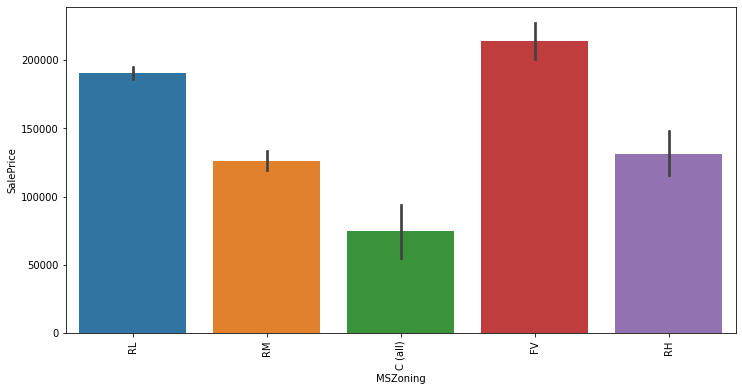

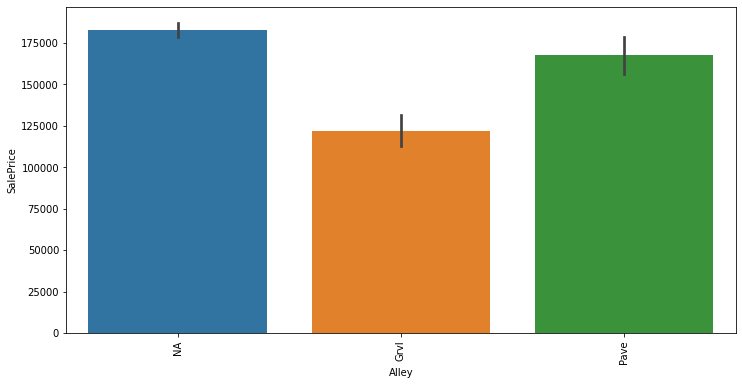

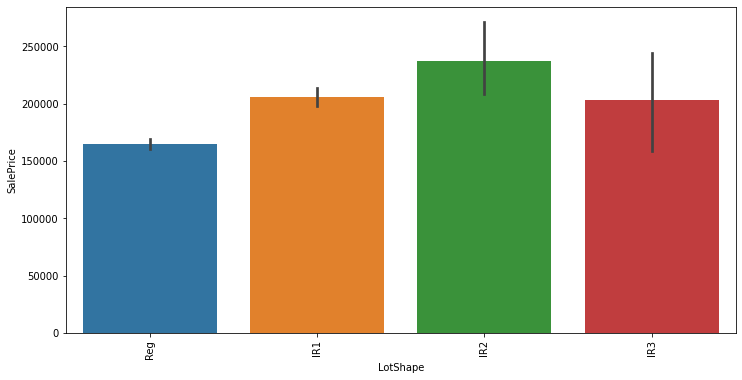

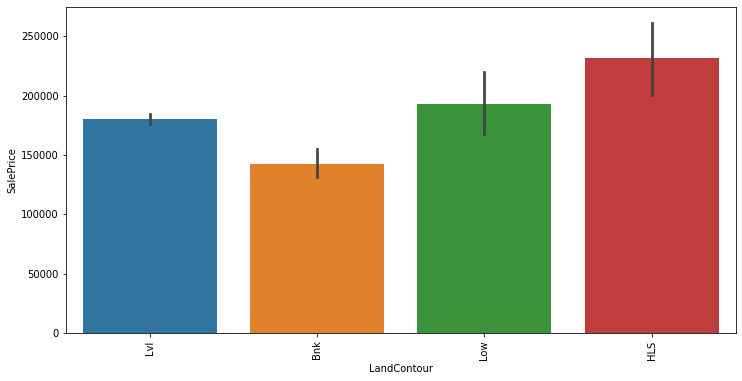

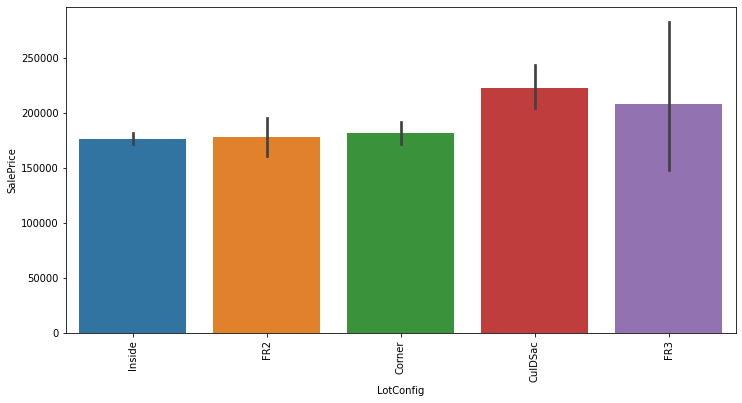

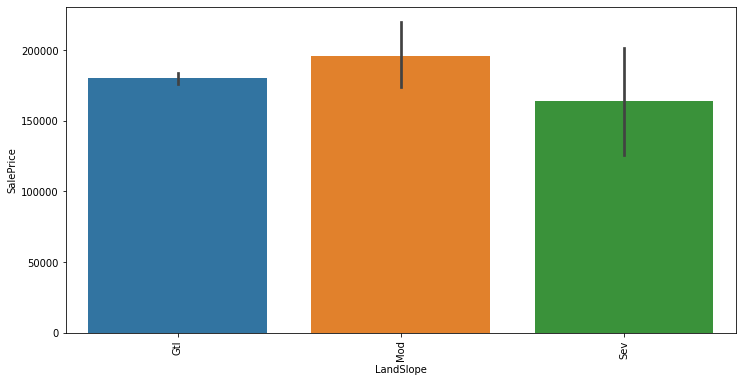

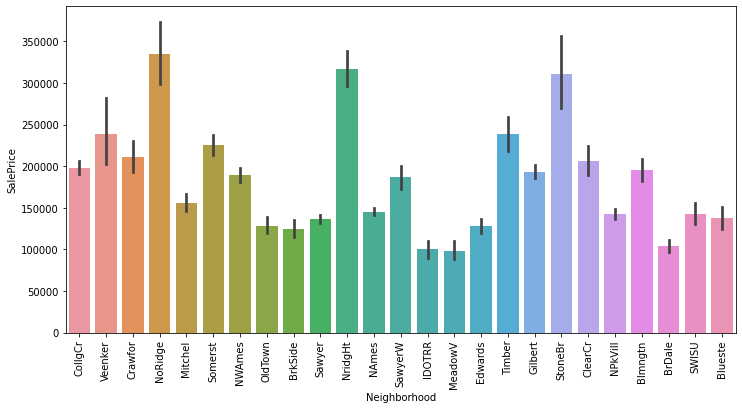

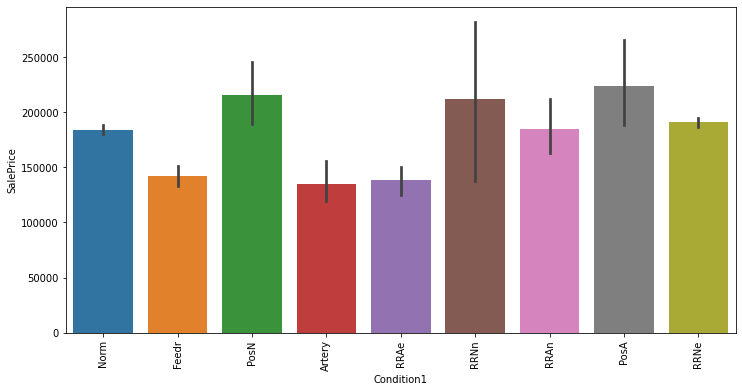

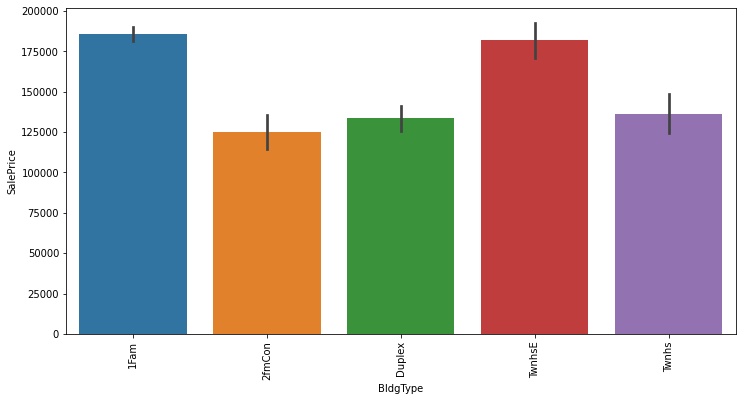

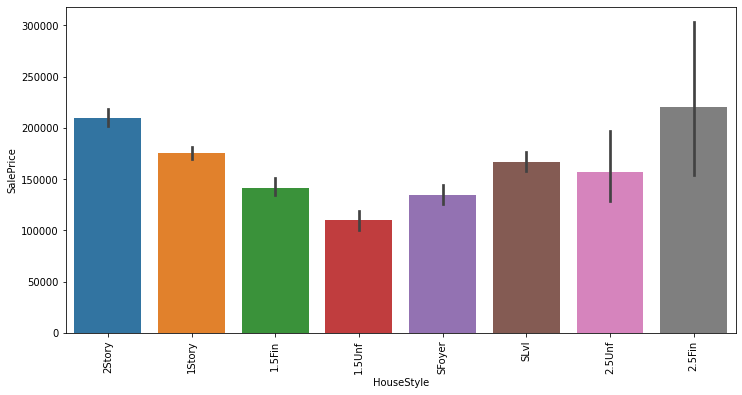

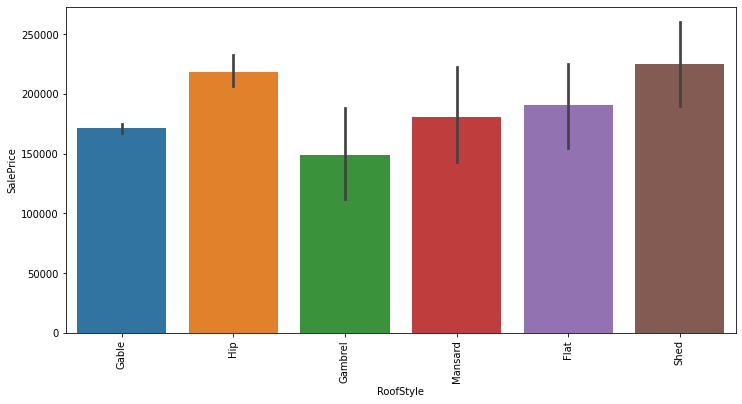

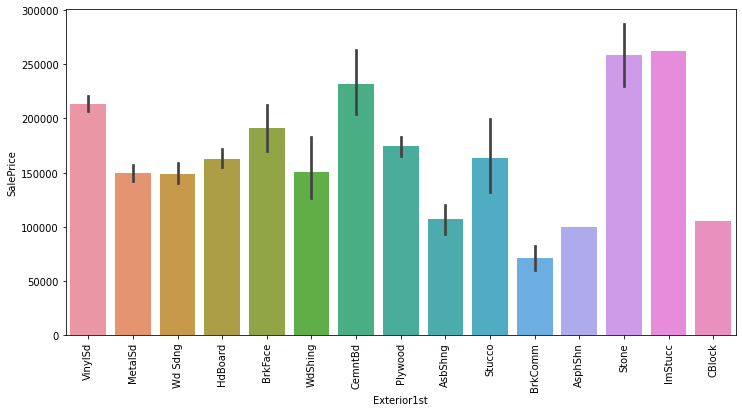

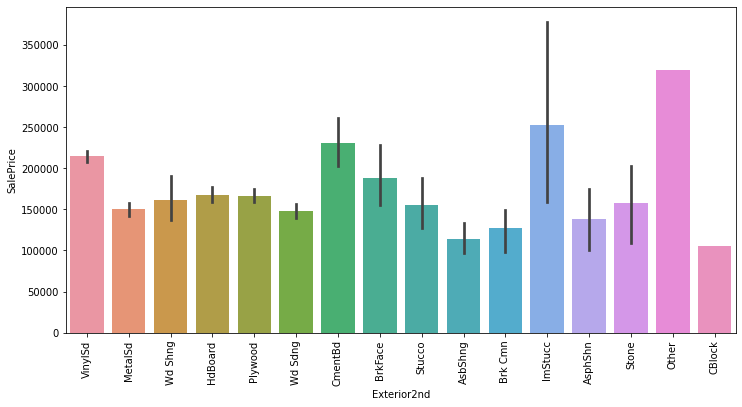

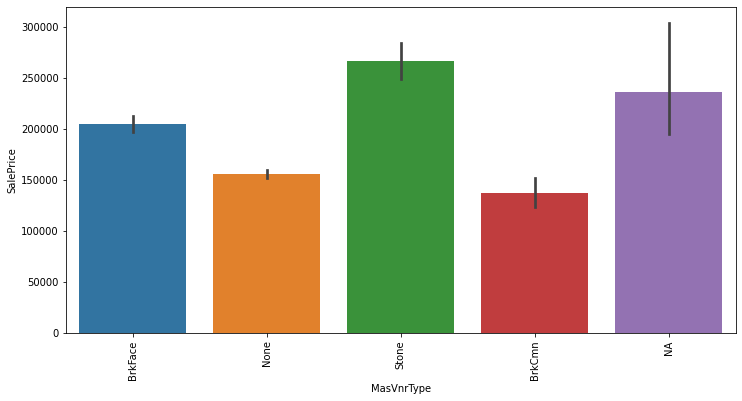

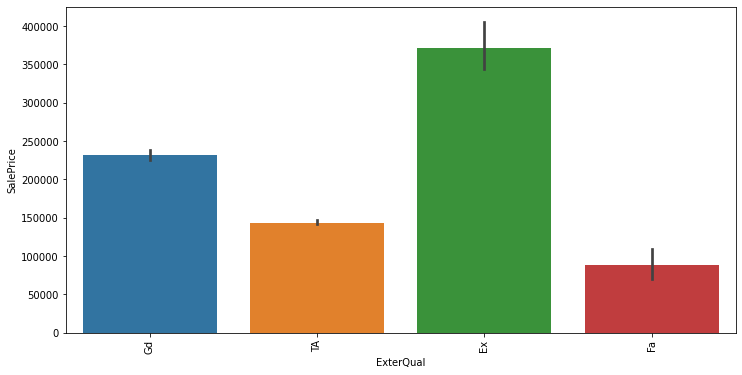

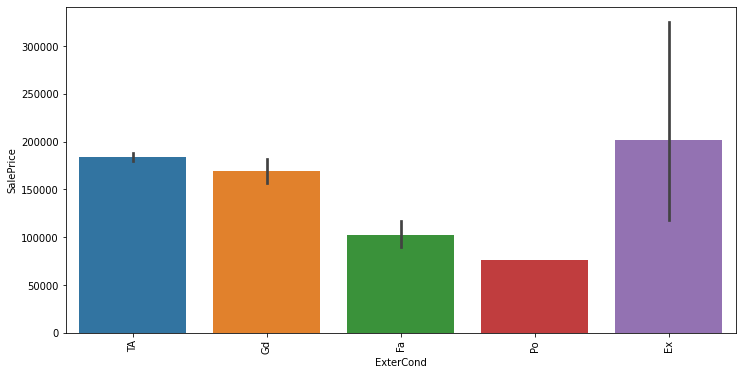

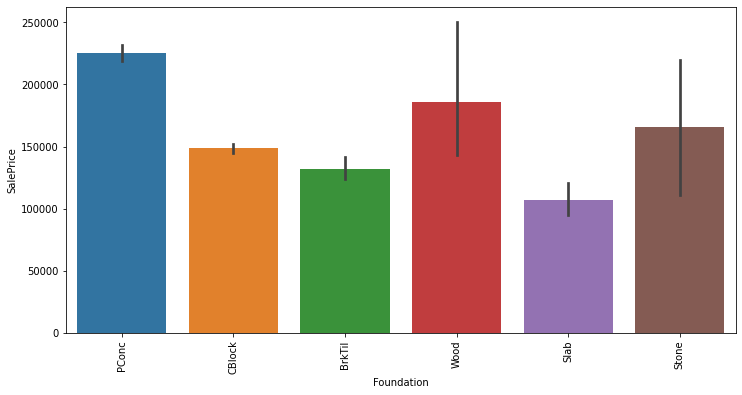

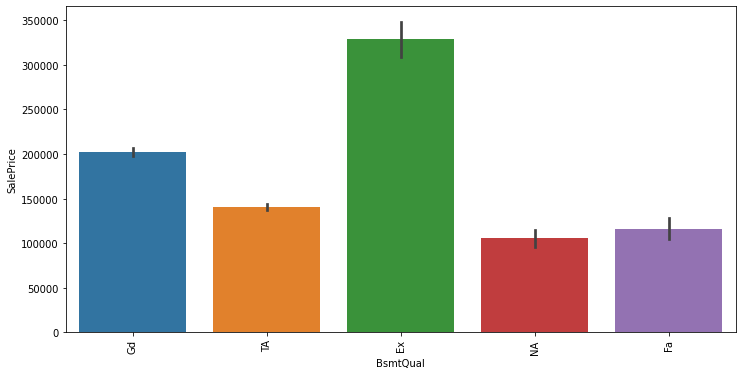

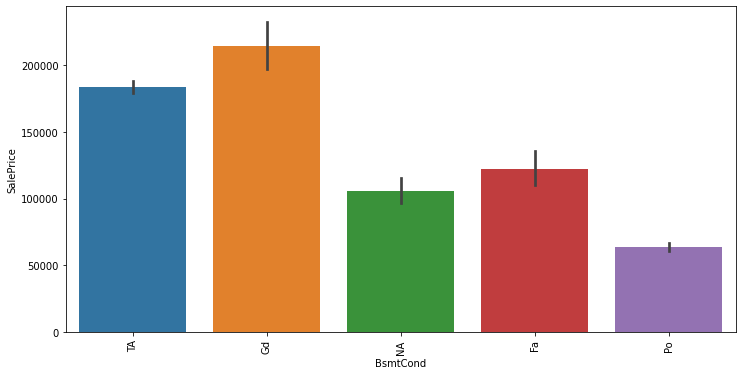

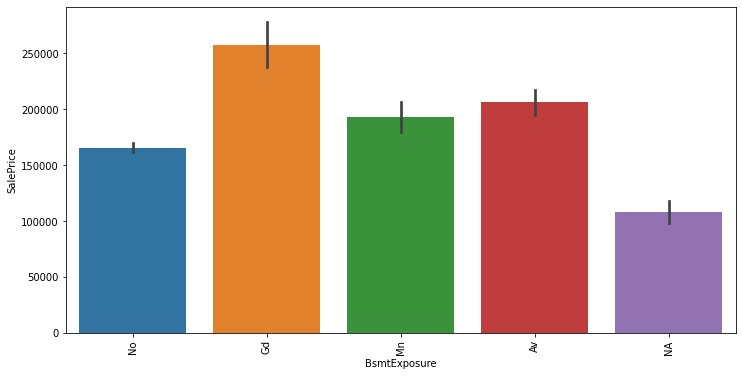

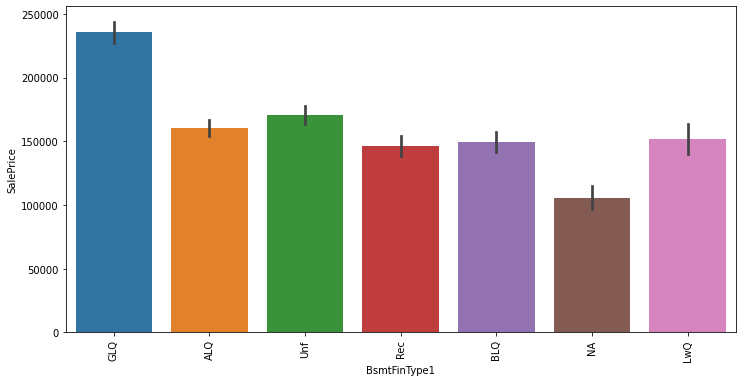

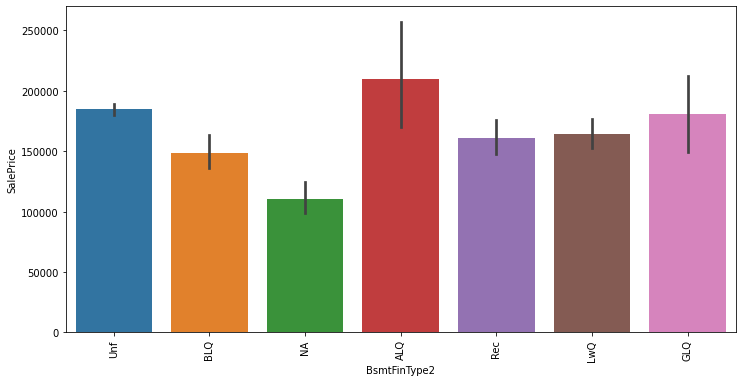

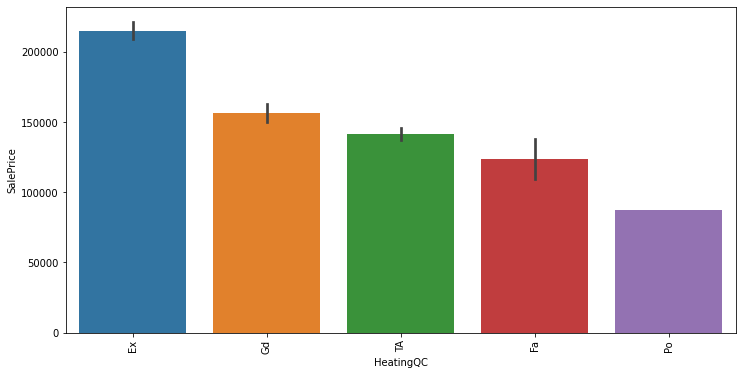

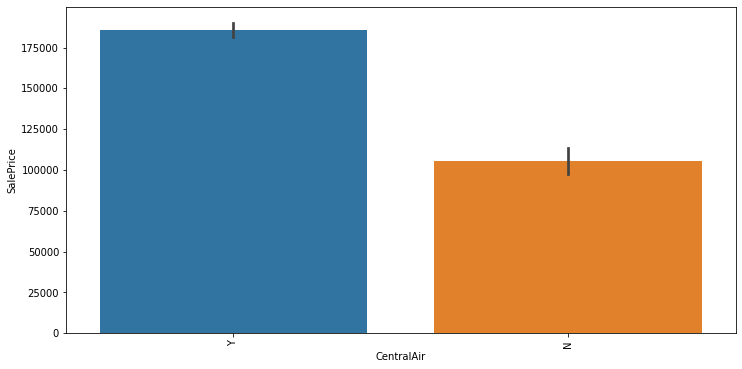

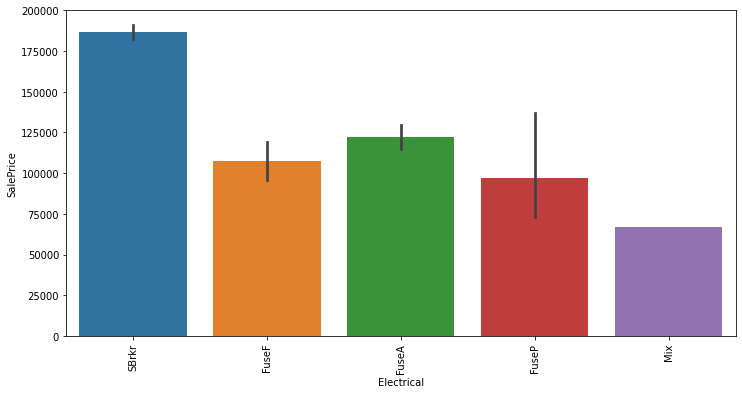

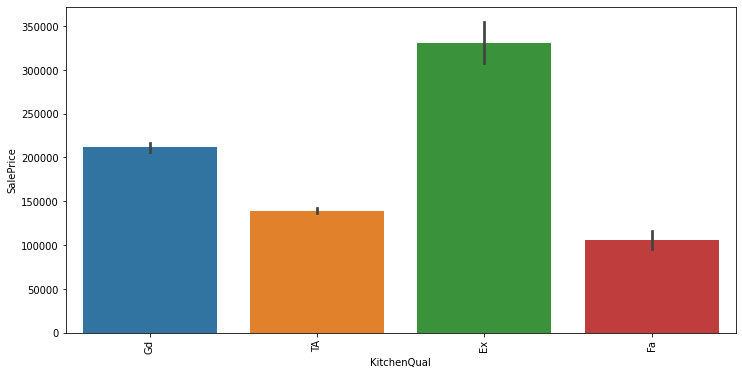

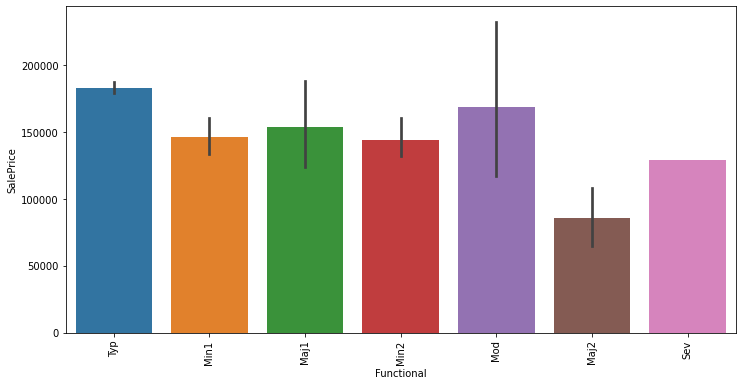

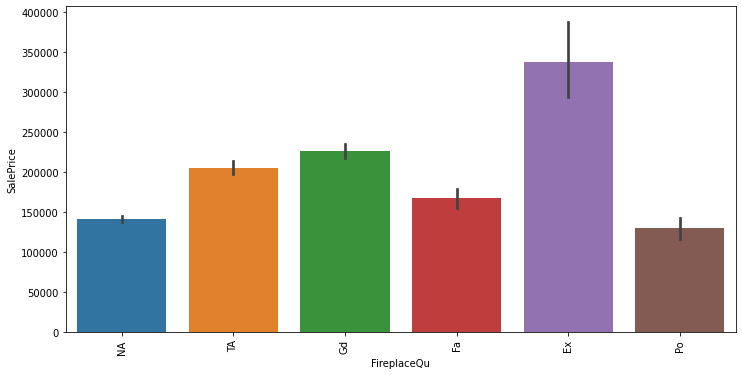

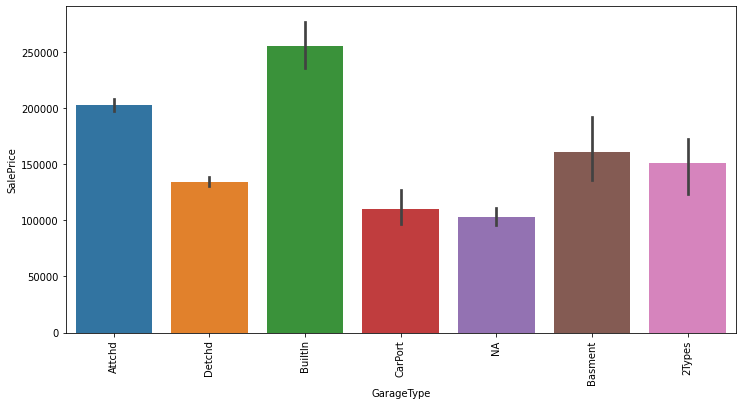

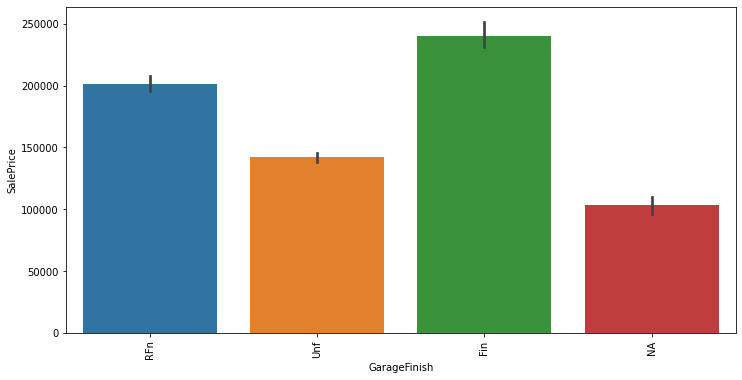

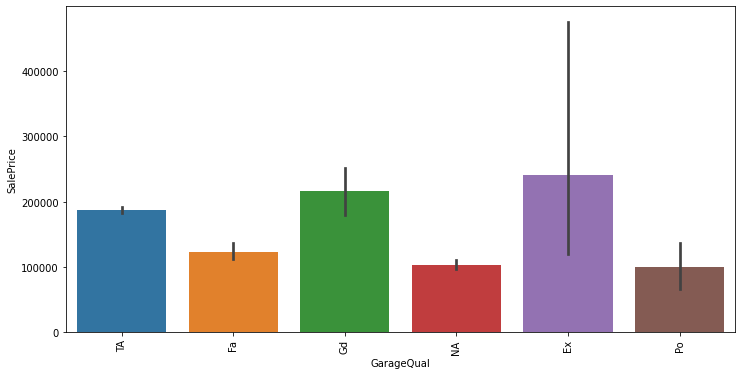

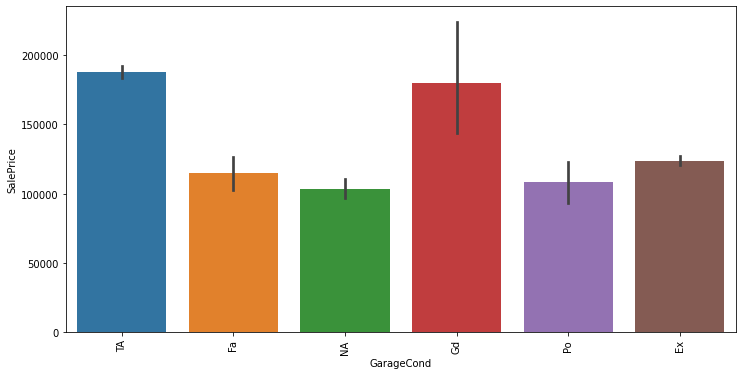

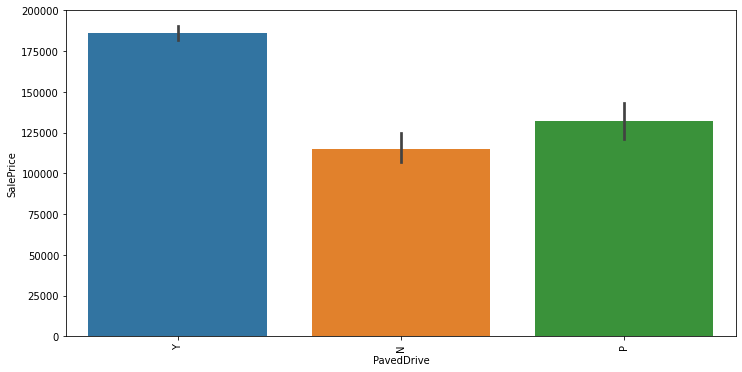

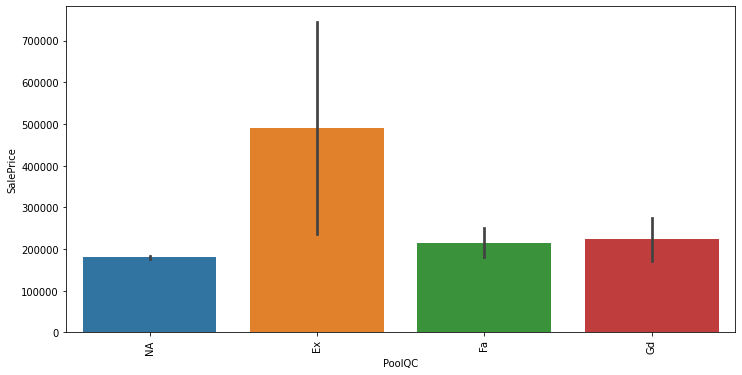

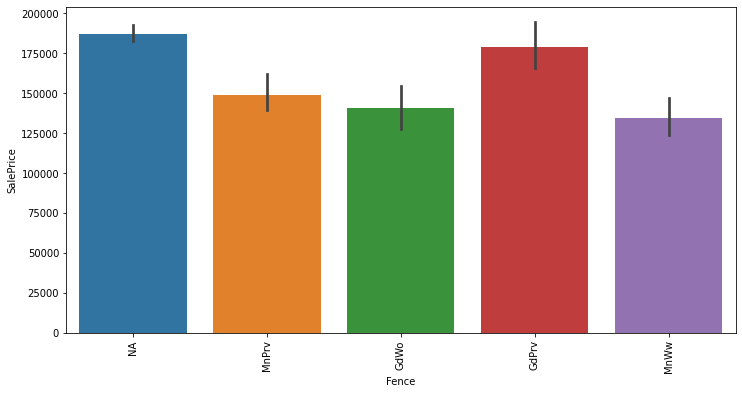

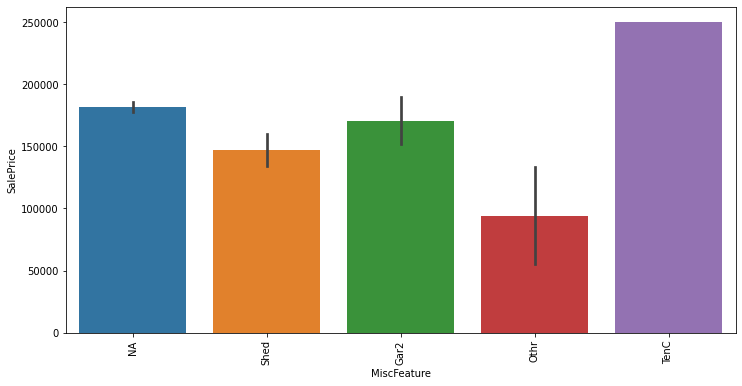

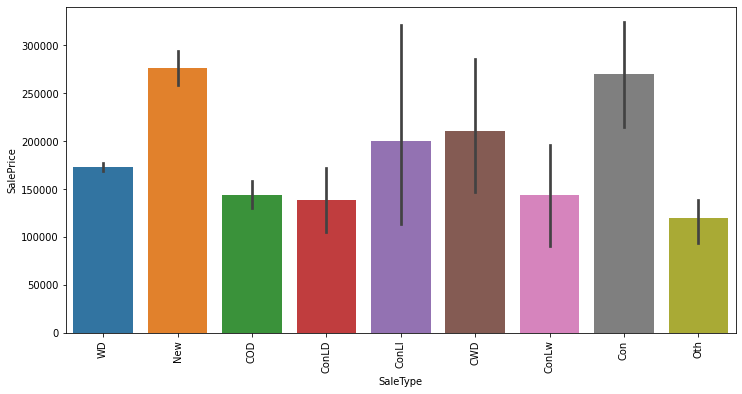

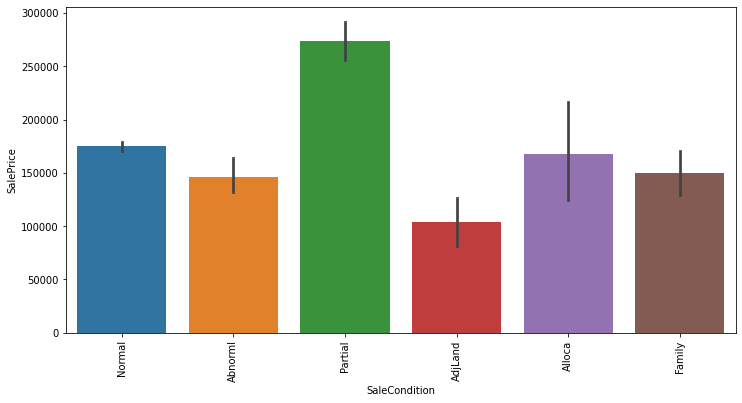

In [25]:
for i in cat_cols: 
    plt.figure(figsize=(12,6))
    sns.barplot(x=i,y='SalePrice',data=df)
    plt.xticks(rotation=90)
    print('\n')
    plt.show()

In [26]:
# correlation matrix
cor = df[cont_cols].corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.385071,-0.280080,0.036038,-0.060494,0.024936,-0.076820,-0.065485,-0.139650,-0.252948,-0.260641,0.308826,0.046648,0.077070,-0.000657,-0.001955,0.132633,0.178126,-0.023397,0.282950,0.040354,-0.048566,-0.040206,-0.099655,-0.022937,-0.005681,-0.012202,-0.037694,-0.026232,0.008100,-0.010697,-0.014339,-0.021111,-0.083289
LotFrontage,-0.385071,1.000000,0.404545,0.228265,-0.063258,0.173045,0.144846,0.039010,0.147896,0.322331,0.366186,0.078060,0.043777,0.336514,0.058138,-0.002719,0.183214,0.051107,0.248011,-0.001087,0.312686,0.218873,0.290924,0.320285,0.085404,0.128872,0.018693,0.059510,0.047053,0.106234,0.001550,0.014382,0.001333,0.359574
LotArea,-0.280080,0.404545,1.000000,0.165281,-0.020825,0.135320,0.214016,0.080406,0.044074,0.300367,0.377382,0.110199,0.019166,0.369595,0.131843,0.030563,0.163059,0.078683,0.196188,-0.014325,0.301587,0.308686,0.257112,0.283559,0.226454,0.149888,-0.002552,0.048820,0.102543,0.070899,0.031049,0.006650,-0.033724,0.367547
OverallQual,0.036038,0.228265,0.165281,1.000000,-0.091005,0.404259,0.229601,-0.060708,0.310101,0.543942,0.474154,0.295637,-0.030160,0.592618,0.106373,-0.039552,0.550895,0.273434,0.101757,-0.183889,0.424742,0.395050,0.601962,0.558903,0.242838,0.304746,-0.113245,0.025818,0.065979,0.044625,-0.030453,0.074964,-0.028279,0.795509
OverallCond,-0.060494,-0.063258,-0.020825,-0.091005,1.000000,-0.126551,-0.044499,0.042375,-0.136563,-0.174589,-0.147663,0.028779,0.025607,-0.080467,-0.054412,0.115096,-0.195219,-0.059802,0.010329,-0.087017,-0.058830,-0.024625,-0.186276,-0.150600,-0.002635,-0.031686,0.070703,0.035576,0.055068,0.002408,0.067741,-0.006067,0.044900,-0.078856
MasVnrArea,0.024936,0.173045,0.135320,0.404259,-0.126551,1.000000,0.243639,-0.069099,0.114915,0.348747,0.329594,0.170293,-0.068741,0.377537,0.079056,0.022652,0.272777,0.198323,0.103090,-0.038020,0.275501,0.238318,0.363724,0.364347,0.160121,0.112248,-0.109544,0.029663,0.063666,-0.020418,-0.030334,-0.000596,-0.006495,0.477035
BsmtFinSF1,-0.076820,0.144846,0.214016,0.229601,-0.044499,0.243639,1.000000,-0.057389,-0.516068,0.472907,0.401614,-0.154228,-0.066448,0.154700,0.655773,0.072423,0.052426,-0.002978,-0.114005,-0.082749,0.017850,0.236128,0.232095,0.276196,0.201114,0.088878,-0.103445,0.046153,0.068412,0.052907,0.002565,-0.001100,0.014303,0.403932
BsmtFinSF2,-0.065485,0.039010,0.080406,-0.060708,0.042375,-0.069099,-0.057389,1.000000,-0.207257,0.105087,0.096148,-0.097481,0.015262,-0.011403,0.150968,0.073428,-0.079373,-0.029971,-0.016096,-0.040509,-0.038228,0.041235,-0.039449,-0.018149,0.069870,0.006504,0.037848,-0.029685,0.090367,0.046932,0.004816,-0.015440,0.028964,-0.019265
BsmtUnfSF,-0.139650,0.147896,0.044074,0.310101,-0.136563,0.114915,-0.516068,-0.207257,1.000000,0.441466,0.335127,0.003957,0.028132,0.249575,-0.421284,-0.097961,0.290743,-0.041651,0.167659,0.029977,0.256081,0.057669,0.215036,0.186477,-0.001198,0.129169,-0.002863,-0.002646,-0.012852,-0.035094,-0.023256,0.036872,-0.041663,0.218570
TotalBsmtSF,-0.252948,0.322331,0.300367,0.543942,-0.174589,0.348747,0.472907,0.105087,0.441466,1.000000,0.809788,-0.193842,-0.033545,0.420840,0.294881,-0.000067,0.331814,-0.058699,0.052569,-0.069991,0.274937,0.322729,0.454089,0.477962,0.234969,0.231749,-0.096192,0.033847,0.092345,0.035972,-0.020094,0.031948,-0.018077,0.644495


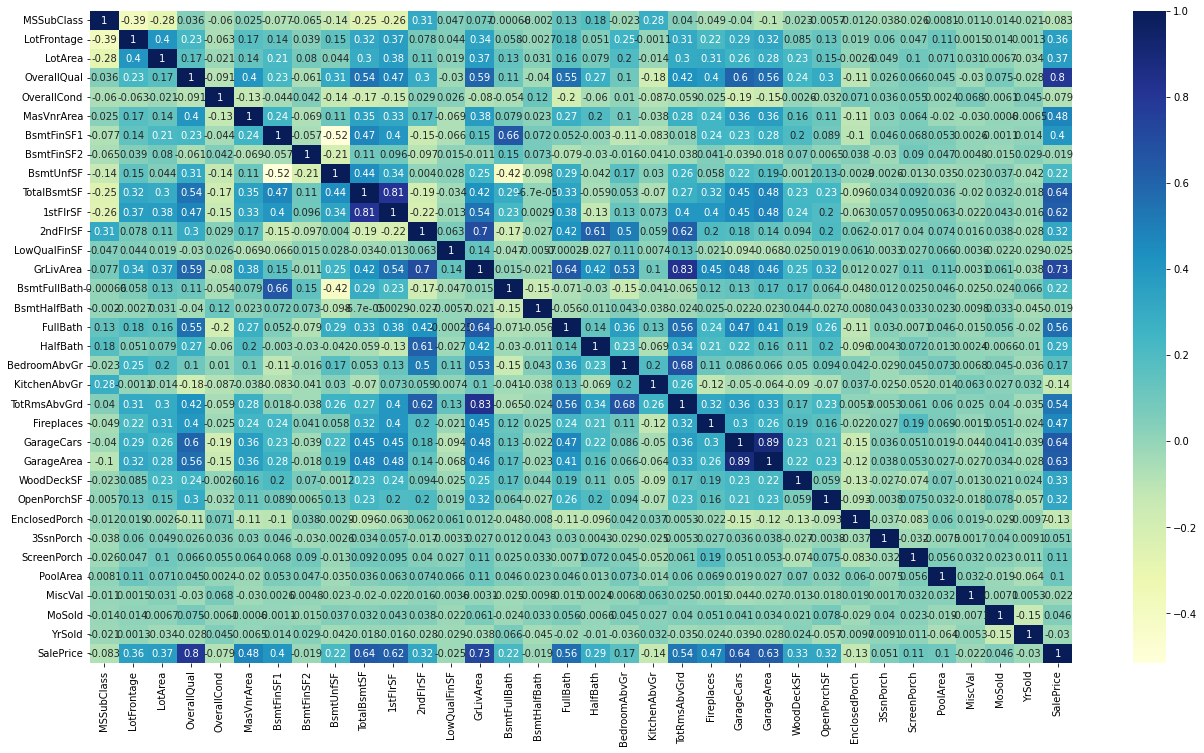

In [27]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(22,12))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

From the above correlation matix:
- "SalePrice" is highly correlated with "GrLivArea", "GarageCars", "TotalBsmtSF".
- "GrLivArea" is highly correlated with "TotRmsAbvGrd"
- "GarageCars" is highly correlated with "GarageArea"
- "AgeYearBuilt" is highly correlated with "AgeGarage"
- "TotalBsmtSF" is highly correlated with "1stFlrSF"

In [28]:
# Dropping columns

cols = ["TotRmsAbvGrd", "GarageArea", "AgeGarage", "1stFlrSF"]
df = df.drop(cols, axis = 1)

for x in cols:
    if x in cont_cols:
        cont_cols.remove(x)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

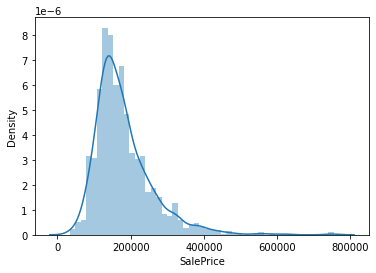

In [29]:
#Check target varaible distribution
sns.distplot(df['SalePrice'],hist=True)

In [30]:
#Target varaible needs transformation to remove skewness

df['SalePrice'] = np.log1p(df['SalePrice'])

In [31]:
df = pd.get_dummies(df,columns = cat_cols,drop_first=True )
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AgeYearBuilt,AgeYearRemodelled,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,2,0,61,0,0,0,0,0,2,2008,12.247699,5,5,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0

In [32]:
df.shape

(1453, 236)

As per above EDA, Sale price is high in case of:

1. MSZoning is Floating Village Residential.
2. Shape of property is Moderately Irregular
3. House style is Two and one-half story
4. Roof style is Shed or Hip
5. If Basement, Garage, External quality and condition is good or excellent.

### Data Preparation

In [33]:
# Splitting the data into train and test

np.random.seed(42)
df_train,df_test = train_test_split(df,train_size=0.70,test_size = 0.30, random_state=42)
print(df_train.shape)
print(df_test.shape)

(1017, 236)
(436, 236)


In [34]:
df[cont_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1453 non-null   int64  
 1   LotFrontage    1453 non-null   float64
 2   LotArea        1453 non-null   int64  
 3   OverallQual    1453 non-null   int64  
 4   OverallCond    1453 non-null   int64  
 5   MasVnrArea     1453 non-null   float64
 6   BsmtFinSF1     1453 non-null   int64  
 7   BsmtFinSF2     1453 non-null   int64  
 8   BsmtUnfSF      1453 non-null   int64  
 9   TotalBsmtSF    1453 non-null   int64  
 10  2ndFlrSF       1453 non-null   int64  
 11  LowQualFinSF   1453 non-null   int64  
 12  GrLivArea      1453 non-null   int64  
 13  BsmtFullBath   1453 non-null   int64  
 14  BsmtHalfBath   1453 non-null   int64  
 15  FullBath       1453 non-null   int64  
 16  HalfBath       1453 non-null   int64  
 17  BedroomAbvGr   1453 non-null   int64  
 18  KitchenA

In [35]:
scaler = MinMaxScaler()

# Fit on train data 
df_train[cont_cols] = scaler.fit_transform(df_train[cont_cols])
df_test[cont_cols] = scaler.fit_transform(df_test[cont_cols])

In [36]:
X = df.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,AgeYearBuilt,AgeYearRemodelled,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,2,0,61,0,0,0,0,0,2,2008,5,5,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0

In [37]:
#response variable to y
y = df['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [38]:
#X_train,y_train,X_test,y_test

y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

### Model Building and Evaluation

**Linear Regression**

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
#Running RFE to understand significance of the feature
rfe = RFE(lm,n_features_to_select=50)             
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 38),
 ('LotFrontage', False, 55),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 147),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 119),
 ('LowQualFinSF', False, 152),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 117),
 ('FullBath', True, 1),
 ('HalfBath', False, 79),
 ('BedroomAbvGr', False, 92),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 10),
 ('OpenPorchSF', False, 143),
 ('EnclosedPorch', False, 73),
 ('3SsnPorch', False, 8),
 ('ScreenPorch', False, 17),
 ('PoolArea', True, 1),
 ('MiscVal', False, 125),
 ('MoSold', False, 122),
 ('YrSold', False, 121),
 ('AgeYearBuilt', False, 175),
 ('AgeYearRemodelled', False, 177),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Alley_NA'

In [42]:
selected_variables = X_train.columns[rfe.support_]
X_train = X_train[selected_variables]
X_test = X_test[selected_variables]

**Linear Regression with 50 features**

In [43]:
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

LinearRegression()

In [44]:
def get_error_stats(y,y_pred,name="Test",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return [MSE,MAE,R2]

In [45]:
print('Train Evaluation for Linear Regression')
y_pred_train = lm1.predict(X_train)
lm1_train_result = get_error_stats(y_train,y_pred_train)

print('Test Evaluation for Linear Regression')
y_pred_test = lm1.predict(X_test)
lm1_test_result = get_error_stats(y_test,y_pred_test)

Train Evaluation for Linear Regression
MSE Test 0.0017385504979323787
MAE Score Test 0.028072216579290345
R2 Score Test 0.8984746073321707 

Test Evaluation for Linear Regression
MSE Test 9.233849149799493e+19
MAE Score Test 8922768179.9418
R2 Score Test -4.2687461231618813e+21 



**Ridge Regression**

In [46]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [47]:
ridge = Ridge()

# cross validation
folds = 5
model_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
print(model_ridge.best_params_)

{'alpha': 0.4}


In [49]:
alpha = model_ridge.best_params_['alpha']
ridge = Ridge(alpha = alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=0.4)

In [50]:
ridge.coef_

array([ 0.06159267,  0.18814348,  0.10874085,  0.06922213,  0.03124107,
        0.0248412 ,  0.08126025,  0.30452497,  0.05288572,  0.04212469,
       -0.07511218,  0.0386347 ,  0.08492595,  0.05255674,  0.12505406,
        0.10888137,  0.10874838,  0.07070952,  0.03462358,  0.04579431,
        0.02575746,  0.02649913, -0.02656673,  0.03092305, -0.02536149,
       -0.01989281, -0.04454523, -0.02855925, -0.04462108,  0.03004439,
       -0.02855925,  0.04450432,  0.03194345,  0.02612664,  0.02754058,
        0.02612664,  0.02550065,  0.02612664, -0.04238667, -0.04983221,
       -0.1031445 , -0.02252384,  0.03118874, -0.00511178, -0.00998279,
        0.00642966,  0.02680924,  0.04526299,  0.02479389,  0.05974081])

In [51]:
print('Train Evaluation for Ridge Regression')
y_pred_train = ridge.predict(X_train)
ridge_train_result = get_error_stats(y_train,y_pred_train)

print('Test Evaluation for Ridge Regression')
y_pred_test = ridge.predict(X_test)
ridge_test_result = get_error_stats(y_test,y_pred_test)

Train Evaluation for Ridge Regression
MSE Test 0.001767938608020512
MAE Score Test 0.028449943003572516
R2 Score Test 0.8967584423890117 

Test Evaluation for Ridge Regression
MSE Test 0.0024442134321309384
MAE Score Test 0.035989323371947865
R2 Score Test 0.8870056631495252 



**Lasso Regression**

In [52]:
lasso = Lasso()

# cross validation
folds = 5
model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
print(model_lasso.best_params_)

{'alpha': 0.0001}


In [54]:
alpha = model_lasso.best_params_['alpha']
lasso = Lasso(alpha = alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [55]:
lasso.coef_

array([ 4.75947707e-02,  2.00334868e-01,  1.08886403e-01,  4.76186785e-02,
        7.88092852e-03, -0.00000000e+00,  1.04850240e-01,  3.07061053e-01,
        5.24497118e-02,  3.71802542e-02, -6.04344456e-02,  3.83779486e-02,
        8.39432210e-02,  1.42366789e-04,  8.47480031e-02,  6.35113872e-02,
        7.21044134e-02,  3.04819086e-02,  2.67716198e-02,  3.60303492e-02,
        1.98390891e-02,  2.15592872e-02, -2.48419838e-02,  2.75413614e-02,
       -2.53645907e-02, -1.61945688e-04, -2.98986425e-03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        3.26210590e-02,  2.29999893e-03,  2.09416300e-02,  1.01330468e-03,
        2.02613851e-02,  1.85457033e-02,  0.00000000e+00, -1.11915995e-02,
       -3.69802278e-02, -1.52832335e-02,  2.26040860e-02, -0.00000000e+00,
       -0.00000000e+00,  1.03602510e-02, -0.00000000e+00,  1.73239800e-02,
        2.43737237e-02,  1.78570131e-02])

In [56]:
print('Train Evaluation for Lasso Regression')
y_pred_train = lasso.predict(X_train)
lasso_train_result = get_error_stats(y_train,y_pred_train)

print('Test Evaluation for Lasso Regression')
y_pred_test = lasso.predict(X_test)
lasso_test_result = get_error_stats(y_test,y_pred_test)

Train Evaluation for Lasso Regression
MSE Test 0.0018528351490469065
MAE Score Test 0.02915236939919215
R2 Score Test 0.8918007752553301 

Test Evaluation for Lasso Regression
MSE Test 0.002737092064075698
MAE Score Test 0.03791956171261108
R2 Score Test 0.8734660817204924 



In [57]:
lm_score = lm1_train_result+lm1_test_result
ridge_score = ridge_train_result+ridge_test_result
lasso_score = lasso_train_result+lasso_test_result

### Observation and Inference

In [58]:
# Comparing results
["Train R2", "Test R2", "Train MSE", "Test MSE", "Train RMSE", "Test RMSE"]
final_result = pd.DataFrame({"Score" : ["Train MSE","Train RMSE","Train R2", "Test MSE","Test RMSE","Test R2"],
                      "Linear Regression" : lm_score,
                      "Ridge" : ridge_score,
                      "Lasso" : lasso_score})

final_result.round(3)

,Score,Linear Regression,Ridge,Lasso
0,Train MSE,2.000000e-03,0.002,0.002
1,Train RMSE,2.800000e-02,0.028,0.029
2,Train R2,8.980000e-01,0.897,0.892
3,Test MSE,9.233849e+19,0.002,0.003
4,Test RMSE,8.922768e+09,0.036,0.038
5,Test R2,-4.268746e+21,0.887,0.873


### From above observations we can conclude that -
####  Linear Regression is overfitting the model
####  Ridge and Lasso are performing equally better

In [59]:
# Comparing co-efficients

coefficients = pd.DataFrame({"Feature" : X_train.columns,
                     "Linear Regression" : lm1.coef_,
                     "Ridge" : ridge.coef_,
                     "Lasso" : lasso.coef_})

coefficients

,Feature,Linear Regression,Ridge,Lasso
0,LotArea,5.923057e-02,0.061593,0.047595
1,OverallQual,1.855290e-01,0.188143,0.200335
2,OverallCond,1.078726e-01,0.108741,0.108886
3,BsmtFinSF1,-7.346911e+10,0.069222,0.047619
4,BsmtFinSF2,-4.791746e+10,0.031241,0.007881
5,BsmtUnfSF,-7.593975e+10,0.024841,-0.000000
6,TotalBsmtSF,1.042221e+11,0.081260,0.104850
7,GrLivArea,3.288410e-01,0.304525,0.307061
8,BsmtFullBath,5.335610e-02,0.052886,0.052450
9,FullBath,3.546074e-02,0.042125,0.037180


#### Even though Ridge and Lasso are performing better, preferring Lasso model as few of the co-efficients pushed to zero

In [60]:
# Final Lasso model
alpha = model_lasso.best_params_['alpha']
lasso = Lasso(alpha = alpha)

#fitting model
lasso.fit(X_train, y_train)

#prediction using lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

#looking at r2 score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train R2 Score:", r2_train)
print("Test R2 Score:", r2_test)

Train R2 Score: 0.8918007752553301
Test R2 Score: 0.8734660817204924


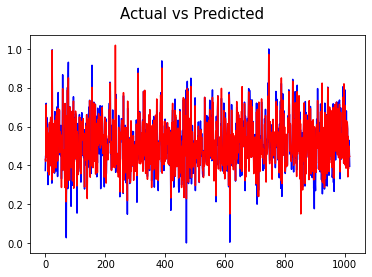

In [61]:
# Actual vs Predicted
c = [i for i in range(0, len(X_train), 1)]
plt.plot(c, y_train, color="blue")
plt.plot(c, y_pred_train, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.show()

Text(0, 0.5, 'y_test_pred')

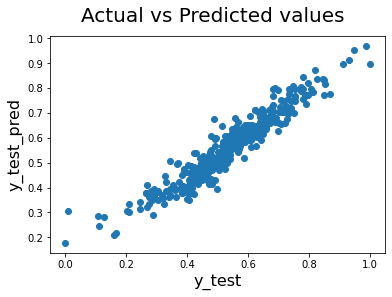

In [62]:
fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('Actual vs Predicted values', fontsize = 20)              
plt.xlabel('y_test', fontsize = 16)                          
plt.ylabel('y_test_pred', fontsize = 16)  

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

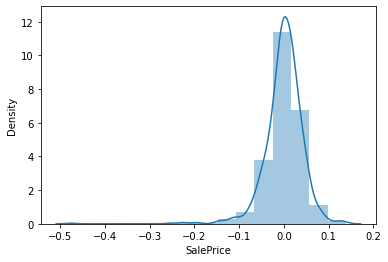

In [63]:
# Residual Analysis

y_pred_train = lasso.predict(X_train)
sns.distplot(y_train - y_pred_train, bins = 15)

<AxesSubplot:ylabel='SalePrice'>

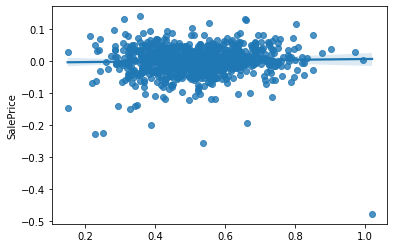

In [64]:
sns.regplot(y_pred_train, y_train - y_pred_train)

**From the above plots, we can say, our model does not violates any assumptions of linear regression.**

In [65]:
coefficients[["Feature", "Lasso"]]

,Feature,Lasso
0,LotArea,0.047595
1,OverallQual,0.200335
2,OverallCond,0.108886
3,BsmtFinSF1,0.047619
4,BsmtFinSF2,0.007881
5,BsmtUnfSF,-0.000000
6,TotalBsmtSF,0.104850
7,GrLivArea,0.307061
8,BsmtFullBath,0.052450
9,FullBath,0.037180


### Inference

**Linear Regresion Model :**

Overfitting observed

**Ridge Model:**

- Optimal value of lambda for Ridge regression is 0.4
- Train and Test R2 values are 0.897 and 0.887

**Lasso Model:**

- Optimal value of lambda for Lasso regression is 0.0001
- Train and Test R2 values are 0.892 and 0.873


**Top 10 variables that are significant in predicting the price of a house obtained from Lasso regression are:**

1. GrLivArea(0.307061)
2. OverallQual(0.200335)
3. OverallCond(0.108886)
4. TotalBsmtSF(0.10485)
5. MSZoning_FV(0.084748)
6. GarageCars(0.083943)
7. MSZoning_RL(0.072104)
8. MSZoning_RH(0.063511)
9. KitchenAbvGr(-0.060434)
10. BsmtFullBath(0.05245)
